# Scans 9 vs 11 - Z4 detected
Here are the final results from our best attempt to date (June 6, 2019) of detecting the zernike signal (Z4) that was placed in the signal scan (#11) during the March 27 2019 tests.  We finally detected the Z4 after the following steps were introduced:

   * used the more appropriate f_scale value of 1.0 in the fitting stage; this really improved our fit enough to detect the Z4
   * after diffing the two processed scans, we filter out the edges before fitting for zernikies.  This removes a lot of the higher order zernikies that were coming about in trying to fit the very noisy edges
   * in the initial processing stage, we are rotating the data by -10 to properly place the vertex at the top center of our image.  Before we did this, the power in Z4 was spread across other zernike coefficients.
   
These results also represent recent work that gone into the post processing.  The most important of these is the semi-automated cleaning.  Recall that all previous processing was done on data that manually 'cleaned' - that is all unwanted data, such as the ground, have been removed.  For a given set of data where the scanner location and scanning range remains the constant, we can 'clean' this data simply by assigning a radial filter using the estimated center of our data.  The below processed data was done on raw, non-cleaned data.

In addition, there are other newer steps we are doing in the initial post-processing steps, all of which were investigatory in nature and do not seem to make large differences to the final result:
   * bad neighbor filtering
   * intensity filtering
   * filtering based of the parabola fit found on previous runs on this same data
   

In [1]:
from lassiAnalysis import processLeicaScanPair


Loading processed data from file: Scan-9.full.copy.ptx.processed.npz
Loading processed data from file: Scan-11.full.copy.ptx.processed.npz
Finding difference between scans ...
xs1 dims -46.109527587890625 49.43724822998047 1.6638603210449219
ys1 dims 7.872903823852539 102.46398162841797 55.168442726135254
xs2 dims -46.127994537353516 49.42927932739258 1.6506423950195312
ys2 dims 7.872974395751953 102.44965362548828 55.16131401062012
Center (1.663860, 55.168443), Removing points close to edge: radius=45.500000
radialReplace replaced 74240 points with nan
Fitting difference to zernikies ...


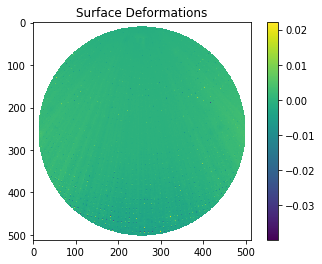

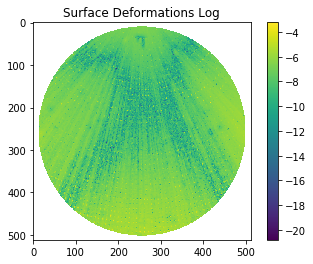

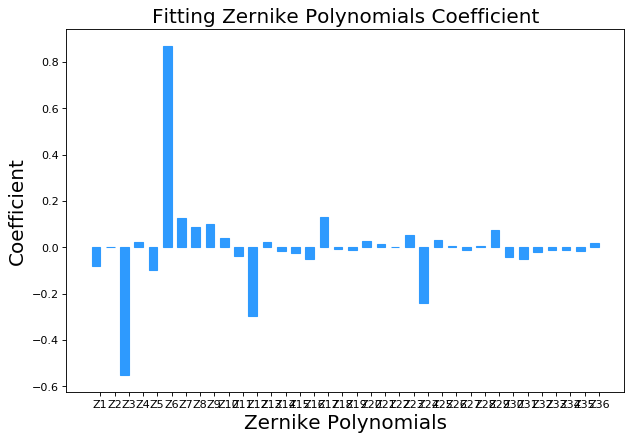

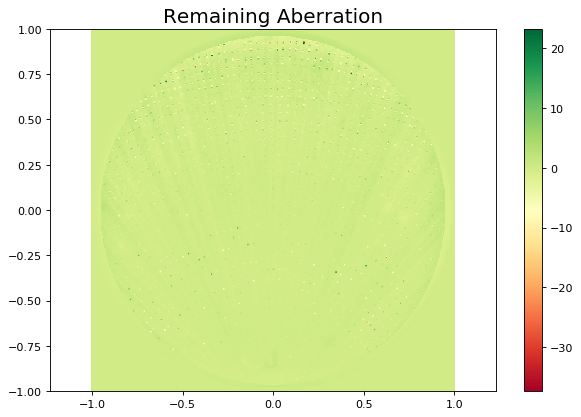

                            Zernike Polynomials List                              
----------------------------------------------------------------------------------
|   Z1  |   Z2  |   Z3  |   Z4  |   Z5  |   Z6  |   Z7  |   Z8  |   Z9  |  Z10  |
----------------------------------------------------------------------------------
| 0.000 | 0.001 |-0.552 | 0.023 |-0.097 | 0.870 | 0.128 | 0.090 | 0.102 | 0.040 |
----------------------------------------------------------------------------------
|  Z11  |  Z12  |  Z13  |  Z14  |  Z15  |  Z16  |  Z17  |  Z18  |  Z19  |  Z20  |
----------------------------------------------------------------------------------
|-0.039 |-0.298 | 0.024 |-0.015 |-0.023 |-0.052 | 0.130 |-0.007 |-0.010 | 0.026 |
----------------------------------------------------------------------------------
|  Z21  |  Z22  |  Z23  |  Z24  |  Z25  |  Z26  |  Z27  |  Z28  |  Z29  |  Z30  |
----------------------------------------------------------------------------------
| 0.015 |

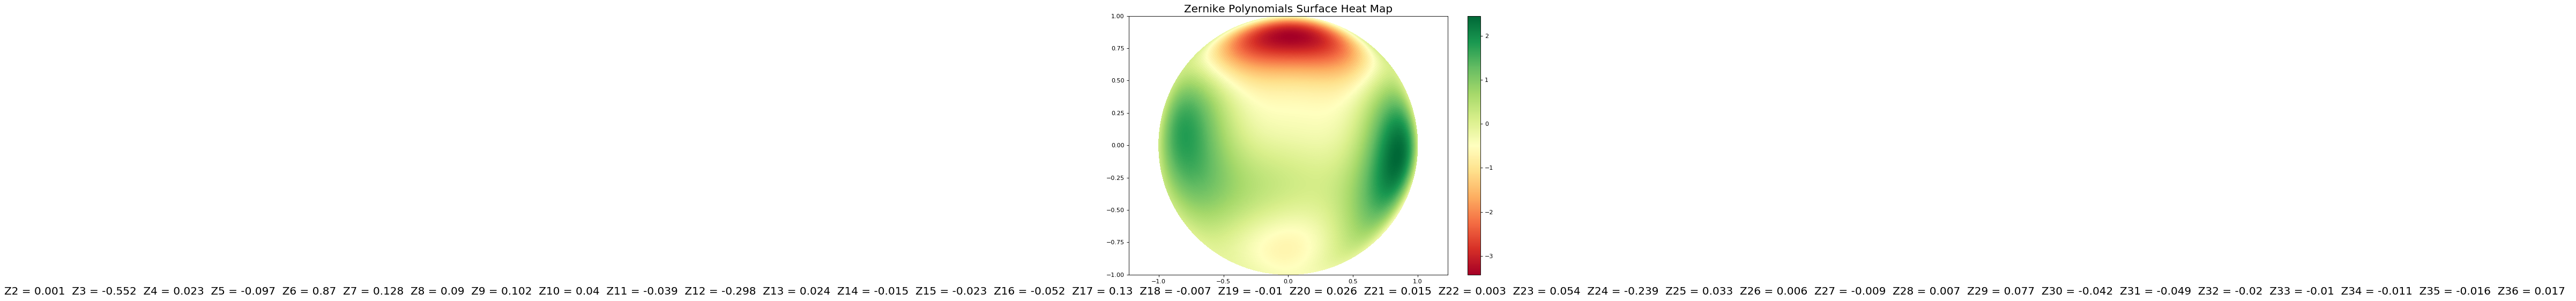

Converting from Noll to Active Surface ANSI Zernikies ...
nolZs
[0]
[0.001, -0.552]
[0.023, -0.097, 0.87]
[0.128, 0.09, 0.102, 0.04]
[-0.039, -0.298, 0.024, -0.015, -0.023]
[-0.052, 0.13, -0.007, -0.01, 0.026, 0.015]
[0.003, 0.054, -0.239, 0.033, 0.006, -0.009, 0.007]
[0.077, -0.042, -0.049, -0.02, -0.01, -0.011, -0.016, 0.017]
active surface Zs
[0]
[0.001, -0.552]
[0.87, 0.023, -0.097]
[0.04, 0.09, 0.128, 0.102]
[-0.015, -0.298, -0.039, 0.024, -0.023]
[0.026, -0.007, -0.052, 0.13, -0.01, 0.015]
[-0.009, 0.006, -0.239, 0.003, 0.054, 0.033, -0.009]
[0.017, -0.011, -0.02, -0.042, 0.077, -0.049, -0.01, -0.016]
CPU times: user 47.2 s, sys: 3.1 s, total: 50.3 s
Wall time: 45.2 s


In [2]:
%%time
fn1 = "/home/sandboxes/jbrandt/Telescope27Mar2019/Scan-9.full.copy.ptx"
fn2 = "/home/sandboxes/jbrandt/Telescope27Mar2019/Scan-11.full.copy.ptx"

xy, diffData = processLeicaScanPair(fn1, fn2, processed=True, rFilter=True)

## Conclusions
This is great!  One can see that the value above of 0.87 mm is the domineering zernike detected, and our we injected a Z4 of amplitude of 1.7 mm.
Issues:
   * There is an obvious tilt to this data, that is represented by the -0.552 Z3 term, and fact that our center 'cross' is not centered
   * There are still some higher order zernikes that have larger amplitudes then we would like 